# Ensembling Techniques Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')


In [2]:
dia = pd.read_csv('diabetes.csv')
dia.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

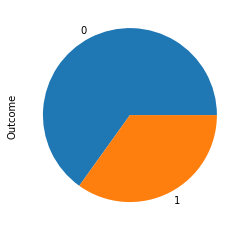

In [5]:
dia["Outcome"].value_counts().plot(kind = "pie")
plt.show()

In [6]:
X = dia.iloc[:,:-1]
y = dia.iloc[:,-1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Naive Aggregation

In [8]:
log = LogisticRegression()
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion = "entropy")

In [9]:
model_list = [('log',log),('dt1',dt1),('dt2',dt2)]

In [10]:
from sklearn.ensemble import VotingClassifier

#### Hard Voting

In [11]:
vch = VotingClassifier(estimators = model_list)
vch.fit(X_train,y_train)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt1',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini...
                              DecisionTr

In [12]:
y_pred = vch.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.81       146
           1       0.70      0.58      0.63        85

    accuracy                           0.75       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



#### Soft Voting

In [13]:
vcs = VotingClassifier(estimators = model_list, voting = 'soft')

In [14]:
vcs.fit(X_train,y_train)

VotingClassifier(estimators=[('log',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt1',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini...
                              DecisionTr

In [15]:
y_preds = vcs.predict(X_test)

In [16]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       146
           1       0.68      0.55      0.61        85

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231



## Bootstrap Aggregation (Bagging)

In [17]:
from sklearn.ensemble import BaggingClassifier

In [18]:
bc1 = BaggingClassifier(log, n_estimators = 8, random_state = 1)
bc1.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=8, n_jobs=None, oob_score=False,
                  random_state=1, ver

In [19]:
y_pred1 = bc1.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.59      0.67        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



### Pasting

In [20]:
bc2 = BaggingClassifier(log, n_estimators = 8,random_state = 1,bootstrap = False)
bc2.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=8, n_jobs=None, oob_score=False,
                  random_state=1, ve

In [21]:
y_pred2 = bc2.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf1 = RandomForestClassifier(n_estimators = 12)

In [24]:
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=12,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
y_predrf = rf1.predict(X_test)
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.59      0.67        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



## Stacking

In [26]:
from mlxtend.classifier import StackingClassifier

In [27]:
dt1 = DecisionTreeClassifier()
dt2 = DecisionTreeClassifier(criterion = 'entropy')

In [28]:
model_list = [log,dt1,dt2]

In [29]:
sc = StackingClassifier(classifiers = model_list,meta_classifier = log)
sc.fit(X_train, y_train)

StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                      

In [30]:
y_predsc = sc.predict(X_test)
print(classification_report(y_test, y_predsc))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       146
           1       0.70      0.59      0.64        85

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



In [31]:
sc.meta_clf_.coef_

array([[0.71229784, 4.01885897, 4.01885897]])

In [32]:
sc2 = StackingClassifier(classifiers = model_list,meta_classifier = DecisionTreeClassifier())

In [33]:
sc2.fit(X_train, y_train)

StackingClassifier(average_probas=False,
                   classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False),
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                      

In [34]:
y_predsc2 = sc2.predict(X_test)
print(classification_report(y_predsc2, y_test))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       157
           1       0.51      0.58      0.54        74

    accuracy                           0.68       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.70      0.68      0.69       231



In [35]:
print(sc2.meta_clf_.feature_importances_)

[0. 1. 0.]
